<a href="https://colab.research.google.com/github/zahraDehghanian97/stock_market/blob/master/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learing model in Keras
Implementation Steps:
 1- Data preparation (Train/Validation/Test)
 2- Crrating layers and model
 3- Setting training parameters (Loss & optimization function ,...)
 4- Train the model (using fit())


In [19]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [20]:
X_train=train_images.reshape(60000,784)
X_test=test_images.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

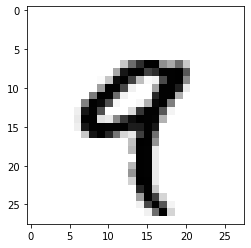

In [ ]:
import matplotlib.pyplot as plt
digit=train_images[4]
plt.imshow(digit,cmap='binary')

In [ ]:
my_data=train_images[10:100]
print(my_data.ndim)
print(my_data.shape)
print(my_data.dtype)


3
(90, 28, 28)
uint8


In [7]:
import glob
import cv2
import numpy as np


In [12]:
! curl -L https://api.github.com/repos/zahraDehghanian97/stock_market/tarball --output repo.tar
! tar xf repo.tar --wildcards "*/I_Train/*.png" --strip-components=1 
! tar xf repo.tar --wildcards "*/I_Trainnot/*.png" --strip-components=1 
! rm -rf repo.tar


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15.5M    0 15.5M    0     0  7476k      0 --:--:--  0:00:02 --:--:-- 5960k


In [13]:
images=glob.glob("T_Image"+"/*.png")
labels=glob.glob("I_Trainnot"+"/*.png")


In [14]:
X=[]
width=200
heigh=100
for img in images:
  image=cv2.imread(img)
  image=cv2.resize(image,(width,heigh))
  image= image/np.max(image)
  image=image.astype(np.float32)
  X.append(image)

In [18]:
Y=[]
out_width=200
out_heigh=100
nClasses=12
seg_labels=np.zeros([out_heigh,out_width,nClasses],dtype='uint8')
for mask in labels:
  label=cv2.imread(mask)
  label=cv2.resize(label,(out_width,out_heigh))
  label= label[:,:,0]
  for c in range(nClasses):
    seg_labels[:,:,c]=(label==c)
  label=label.astype(np.uint8)
  Y.append(label)

In [11]:
np.max(image)


1.0

In [ ]:
pip install opencv-python

In [ ]:
len(images)

0